# First dataset: Infrastructure

## Importing packages and filepath

In [1]:
#Importing the packages
import pandas as pd
import numpy as np

In [2]:
#Importing filepath
filepath2 = 'C:/Users/User/Documents/Data Science/Data/WORLD DEVELOPMENT BANK/WorldBank_Infrastructure/Infrastructure_Data.csv'

In [3]:
infra_data = pd.read_csv(filepath2)

## Inspecting the data

In [4]:
#Checking general info
infra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   2130 non-null   object
 1   Country Code   2128 non-null   object
 2   Series Name    2128 non-null   object
 3   Series Code    2128 non-null   object
 4   2019 [YR2019]  2128 non-null   object
dtypes: object(5)
memory usage: 83.4+ KB


In [5]:
#Checking columns
infra_data.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2019 [YR2019]'],
      dtype='object')

In [6]:
#Some values are dots instead of null, replacing them to see actual null values
infra_data = infra_data.replace('..', np.nan)

In [7]:
#Checking for null values
infra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   2130 non-null   object
 1   Country Code   2128 non-null   object
 2   Series Name    2128 non-null   object
 3   Series Code    2128 non-null   object
 4   2019 [YR2019]  887 non-null    object
dtypes: object(5)
memory usage: 83.4+ KB


In [8]:
#Converting numeric column 2019 to Float64
infra_data['2019 [YR2019]'] = pd.to_numeric(infra_data['2019 [YR2019]'], errors='coerce').astype('float64')

In [9]:
infra_data[infra_data['2019 [YR2019]'].isnull()]

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019]
2,Afghanistan,AFG,Container port traffic (TEU: 20 foot equivalen...,IS.SHP.GOOD.TU,NaN
3,Afghanistan,AFG,Liner shipping connectivity index (maximum val...,IS.SHP.GCNW.XQ,NaN
4,Afghanistan,AFG,Pump price for gasoline (US$ per liter),EP.PMP.SGAS.CD,NaN
5,Afghanistan,AFG,Rail lines (total route-km),IS.RRS.TOTL.KM,NaN
6,Afghanistan,AFG,"Railways, goods transported (million ton-km)",IS.RRS.GOOD.MT.K6,NaN
...,...,...,...,...,...
2128,NaN,NaN,NaN,NaN,NaN
2129,NaN,NaN,NaN,NaN,NaN
2130,NaN,NaN,NaN,NaN,NaN
2131,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


In [10]:
#Dropping the two last rows with database information
infra_data.drop(labels=[2131,2132], axis=0, inplace=True)

In [11]:
#Dropping rows with country name as "World" and "NaN"
infra_data.drop(infra_data[(infra_data['Country Name'] == 'World')].index,inplace=True)

In [12]:
#Dropping the two last rows with database information
infra_data.drop(infra_data.index[2112:2131], inplace=True)

In [13]:
infra_data.tail()

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019]
2107,Sub-Saharan Africa (IDA & IBRD countries),TSS,Liner shipping connectivity index (maximum val...,IS.SHP.GCNW.XQ,NaN
2108,Sub-Saharan Africa (IDA & IBRD countries),TSS,Pump price for gasoline (US$ per liter),EP.PMP.SGAS.CD,NaN
2109,Sub-Saharan Africa (IDA & IBRD countries),TSS,Rail lines (total route-km),IS.RRS.TOTL.KM,NaN
2110,Sub-Saharan Africa (IDA & IBRD countries),TSS,"Railways, goods transported (million ton-km)",IS.RRS.GOOD.MT.K6,NaN
2111,Sub-Saharan Africa (IDA & IBRD countries),TSS,Pump price for diesel fuel (US$ per liter),EP.PMP.DESL.CD,NaN


<AxesSubplot:>

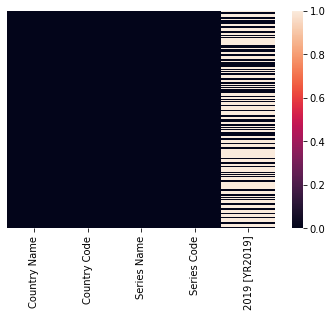

In [14]:
import seaborn as sns

sns.heatmap(infra_data.isnull(), yticklabels=False, cbar=True, cmap='rocket')

In [15]:
infra_clean = infra_data.dropna(subset=['2019 [YR2019]'], axis=0)
infra_clean

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019]
0,Afghanistan,AFG,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,2.001421e+01
1,Afghanistan,AFG,"Air transport, registered carrier departures w...",IS.AIR.DPRT,7.334000e+03
8,Albania,ALB,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,0.000000e+00
9,Albania,ALB,"Air transport, registered carrier departures w...",IS.AIR.DPRT,2.558000e+03
10,Albania,ALB,Container port traffic (TEU: 20 foot equivalen...,IS.SHP.GOOD.TU,1.847935e+04
...,...,...,...,...,...
2097,Sub-Saharan Africa (excluding high income),SSA,"Air transport, registered carrier departures w...",IS.AIR.DPRT,8.579661e+05
2098,Sub-Saharan Africa (excluding high income),SSA,Container port traffic (TEU: 20 foot equivalen...,IS.SHP.GOOD.TU,1.695159e+07
2104,Sub-Saharan Africa (IDA & IBRD countries),TSS,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,3.764726e+03
2105,Sub-Saharan Africa (IDA & IBRD countries),TSS,"Air transport, registered carrier departures w...",IS.AIR.DPRT,8.766701e+05


In [16]:
infra_clean['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia, Th

In [17]:
infra_clean.head(20)

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019]
0,Afghanistan,AFG,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,20.014206
1,Afghanistan,AFG,"Air transport, registered carrier departures w...",IS.AIR.DPRT,7334.000000
8,Albania,ALB,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,0.000000
9,Albania,ALB,"Air transport, registered carrier departures w...",IS.AIR.DPRT,2558.000000
10,Albania,ALB,Container port traffic (TEU: 20 foot equivalen...,IS.SHP.GOOD.TU,18479.350000
11,Albania,ALB,Liner shipping connectivity index (maximum val...,IS.SHP.GCNW.XQ,6.156351
14,Albania,ALB,"Railways, goods transported (million ton-km)",IS.RRS.GOOD.MT.K6,42.940000
16,Algeria,DZA,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,25.641745
17,Algeria,DZA,"Air transport, registered carrier departures w...",IS.AIR.DPRT,76049.000000
18,Algeria,DZA,Container port traffic (TEU: 20 foot equivalen...,IS.SHP.GOOD.TU,688500.000000


In [18]:
#Converting numeric column 2019 to Float64
infra_clean['2019 [YR2019]'] = pd.to_numeric(infra_clean['2019 [YR2019]'], errors='coerce').astype('float64')

C:\Users\User\anaconda3\envs\DataAnalytics\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
infra_df = infra_clean.pivot_table(index=['Country Name','Country Code'],columns='Series Name',values='2019 [YR2019]')
infra_df = infra_df.reset_index()

In [20]:
infra_df[infra_df['Country Name']=='Brazil']

Series Name,Country Name,Country Code,"Air transport, freight (million ton-km)","Air transport, registered carrier departures worldwide",Container port traffic (TEU: 20 foot equivalent units),Liner shipping connectivity index (maximum value in 2004 = 100),Rail lines (total route-km),"Railways, goods transported (million ton-km)"
28,Brazil,BRA,1521.14944,814301.0,10868837.0,36.242341,NaN,NaN


<AxesSubplot:xlabel='Series Name'>

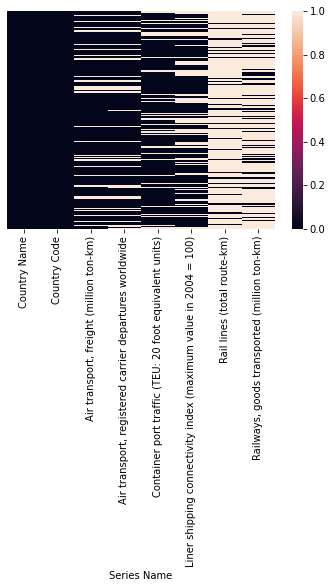

In [21]:
#Plotting a heatmap to check for null values
sns.heatmap(infra_df.isna(), yticklabels=False, cbar=True, cmap='rocket')

In [22]:
#Saving the cleaned df into a CSV file
infra_df.to_csv(r'C:\Users\User\Documents\Data Science\Data\infra_df_raw.csv', index=False)

# Second dataset: Corruption

## Importing filepath

In [23]:
#Importing the data
filepath3 = 'C:/Users/User/Documents/Data Science/Data/WORLD DEVELOPMENT BANK/WorldBank_Corruption/Corruption_Data.csv'
corrup_data = pd.read_csv(filepath3)
corrup_data

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019]
0,Afghanistan,AFG,Average time to clear exports through customs ...,IC.CUS.DURS.EX,..
1,Afghanistan,AFG,Bribery incidence (% of firms experiencing at ...,IC.FRM.BRIB.ZS,..
2,Afghanistan,AFG,"Cost to export, border compliance (US$)",IC.EXP.CSBC.CD,452.7778
3,Afghanistan,AFG,"Cost to export, documentary compliance (US$)",IC.EXP.CSDC.CD,344.4444
4,Afghanistan,AFG,"Cost to import, border compliance (US$)",IC.IMP.CSBC.CD,750
...,...,...,...,...,...
6118,NaN,NaN,NaN,NaN,NaN
6119,NaN,NaN,NaN,NaN,NaN
6120,NaN,NaN,NaN,NaN,NaN
6121,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


## Inspecting the dataset

In [24]:
#Replacing dots to get actual nans
corrup_data = corrup_data.replace('..', np.nan)

In [25]:
#Inspecting the data
corrup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6123 entries, 0 to 6122
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   6120 non-null   object
 1   Country Code   6118 non-null   object
 2   Series Name    6118 non-null   object
 3   Series Code    6118 non-null   object
 4   2019 [YR2019]  3233 non-null   object
dtypes: object(5)
memory usage: 239.3+ KB


In [26]:
#Checking for nulls
corrup_data.isnull().sum()

Country Name        3
Country Code        5
Series Name         5
Series Code         5
2019 [YR2019]    2890
dtype: int64

In [27]:
corrup_data['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Is

In [28]:
corrup_clean = corrup_data.dropna(subset=['2019 [YR2019]'], axis=0)
corrup_clean

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019]
2,Afghanistan,AFG,"Cost to export, border compliance (US$)",IC.EXP.CSBC.CD,452.7778
3,Afghanistan,AFG,"Cost to export, documentary compliance (US$)",IC.EXP.CSDC.CD,344.4444
4,Afghanistan,AFG,"Cost to import, border compliance (US$)",IC.IMP.CSBC.CD,750
5,Afghanistan,AFG,"Cost to import, documentary compliance (US$)",IC.IMP.CSDC.CD,900
6,Afghanistan,AFG,Ease of doing business rank (1=most business-f...,IC.BUS.EASE.XQ,173
...,...,...,...,...,...
6111,World,WLD,"Time to export, border compliance (hours)",IC.EXP.TMBC,52.8693279542553
6112,World,WLD,"Time to export, documentary compliance (hours)",IC.EXP.TMDC,44.5555963510638
6113,World,WLD,"Time to import, border compliance (hours)",IC.IMP.TMBC,66.9454952787234
6114,World,WLD,"Time to import, documentary compliance (hours)",IC.IMP.TMDC,53.0489071914894


In [29]:
corrup_clean['Series Name'].unique()

array(['Cost to export, border compliance (US$)',
       'Cost to export, documentary compliance (US$)',
       'Cost to import, border compliance (US$)',
       'Cost to import, documentary compliance (US$)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Ease of doing business score (0 = lowest performance to 100 = best performance)',
       'Time to export, border compliance (hours)',
       'Time to export, documentary compliance (hours)',
       'Time to import, border compliance (hours)',
       'Time to import, documentary compliance (hours)',
       'Merchandise trade (% of GDP)',
       'Average time to clear exports through customs (days)',
       'Bribery incidence (% of firms experiencing at least one bribe payment request)',
       'Firms experiencing losses due to theft and vandalism (% of firms)',
       'Informal payments to public officials (% of firms)',
       'Losses due to theft and vandalism (% of annual sales of affected firm

In [30]:
#Converting numeric column 2019 to Float64
corrup_clean['2019 [YR2019]'] = pd.to_numeric(corrup_clean['2019 [YR2019]'], errors='coerce').astype('float64')

C:\Users\User\anaconda3\envs\DataAnalytics\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
#Creating a pivtot table to check for values per variable
corrup_df = corrup_clean.pivot_table(index=['Country Name','Country Code'],columns='Series Name',values='2019 [YR2019]')
corrup_df = corrup_df.reset_index()

In [32]:
corrup_df

Series Name,Country Name,Country Code,Average time to clear exports through customs (days),Bribery incidence (% of firms experiencing at least one bribe payment request),"Cost to export, border compliance (US$)","Cost to export, documentary compliance (US$)","Cost to import, border compliance (US$)","Cost to import, documentary compliance (US$)",Ease of doing business rank (1=most business-friendly regulations),Ease of doing business score (0 = lowest performance to 100 = best performance),...,Losses due to theft and vandalism (% of annual sales of affected firms),Merchandise trade (% of GDP),"Tariff rate, applied, simple mean, all products (%)","Tariff rate, applied, simple mean, manufactured products (%)","Tariff rate, applied, simple mean, primary products (%)",Time spent dealing with the requirements of government regulations (% of senior management time),"Time to export, border compliance (hours)","Time to export, documentary compliance (hours)","Time to import, border compliance (hours)","Time to import, documentary compliance (hours)"
0,Afghanistan,AFG,NaN,NaN,452.777800,344.444400,750.000000,900.000000,173.0,44.064970,...,NaN,40.644804,NaN,NaN,NaN,NaN,48.000000,228.000000,96.000000,324.000000
1,Africa Eastern and Southern,AFE,NaN,NaN,557.781728,200.414770,621.457873,258.655054,NaN,53.540691,...,NaN,44.423729,NaN,NaN,NaN,NaN,83.149249,71.611818,113.171659,82.774984
2,Africa Western and Central,AFW,NaN,NaN,654.669605,140.845384,769.123409,319.688045,NaN,49.843345,...,NaN,34.323238,NaN,NaN,NaN,NaN,113.041217,72.153030,140.928573,111.150433
3,Albania,ALB,1.1,36.1,54.670000,10.000000,77.300000,10.000000,82.0,67.748470,...,4.5,55.927689,1.47,1.24,3.36,2.3,9.000000,6.000000,10.000000,8.000000
4,Algeria,DZA,NaN,NaN,592.888900,374.444400,408.777800,399.777800,157.0,48.597580,...,NaN,45.269357,12.49,12.27,14.72,NaN,80.000000,149.142900,209.571400,96.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,West Bank and Gaza,PSE,5.3,7.9,51.111110,80.000000,50.000000,85.000000,117.0,59.978730,...,7.5,NaN,NaN,NaN,NaN,1.0,6.000000,72.000000,6.000000,45.333330
251,World,WLD,NaN,NaN,388.178947,121.642319,442.198811,156.478649,NaN,63.053012,...,NaN,43.949702,NaN,NaN,NaN,NaN,52.869328,44.555596,66.945495,53.048907
252,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,187.0,31.762990,...,NaN,54.107970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,Zambia,ZMB,10.8,9.6,370.000000,200.000000,380.000000,175.000000,85.0,66.936480,...,4.2,61.037379,NaN,NaN,NaN,8.1,120.000000,96.000000,120.000000,72.000000


In [33]:
#Saving the cleaned df into a CSV file
corrup_df.to_csv(r'C:\Users\User\Documents\Data Science\Data\corrup_df_raw.csv', index=False)

<AxesSubplot:xlabel='Series Name'>

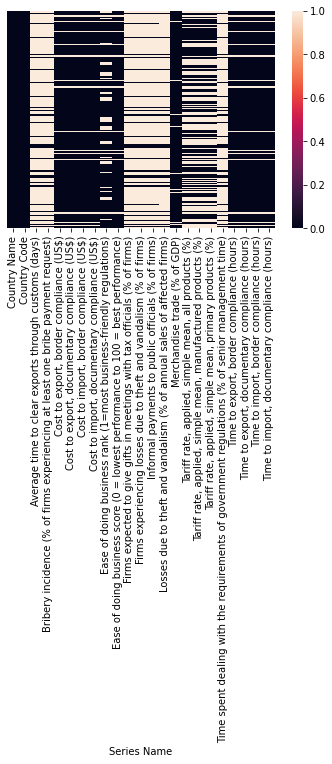

In [34]:
#Plotting a heatmap to check for null values
sns.heatmap(corrup_df.isna(), yticklabels=False, cbar=True, cmap='rocket')

# Third dataset: Global Competitiveness Index

## Importing the data

In [35]:
#!pip install openpyxl
filepath4 = 'C:/Users/User/Documents/Data Science/Data/GCI Extract.xlsx'
data4 = pd.read_excel(filepath4)

In [36]:
data4

,Series unindented,Attribute,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Viet Nam,Yemen,Zambia,Zimbabwe
0,"Irregular payments and bribes, 1-7 (best)",Value,3.915789,3.375160,NaN,3.312793,4.119316,6.215910,5.903105,4.066032,...,3.159622,6.446948,6.050043,5.211036,5.495683,2.334601,3.099605,2.298849,3.095066,3.251438
1,"Irregular payments and bribes, 1-7 (best)",Rank,69.000000,92.000000,NaN,98.000000,61.000000,12.000000,20.000000,63.000000,...,106.000000,6,17.000000,34.000000,28.000000,132.000000,109.000000,134,110.000000,99.000000
2,Favoritism in decisions of government official...,Value,2.944446,3.143458,NaN,2.599259,3.370867,4.470769,3.799563,4.358207,...,2.364397,5.713162,4.548912,4.574234,4.038132,1.492727,3.293947,2.236217,2.675180,1.883559
3,Favoritism in decisions of government official...,Rank,73.000000,64.000000,NaN,98.000000,53.000000,21.000000,36.000000,24.000000,...,111.000000,2,18.000000,17.000000,31.000000,137.000000,56.000000,117,91.000000,133.000000
4,"Burden of government regulation, 1-7 (best)",Value,4.643303,3.233405,NaN,2.442527,3.731478,3.286522,3.490389,4.642957,...,3.285602,5.351108,3.961385,4.678167,2.868305,1.650391,3.316702,3.119808,3.727072,2.091379
5,"Burden of government regulation, 1-7 (best)",Rank,14.000000,84.000000,NaN,128.000000,43.000000,80.000000,65.000000,15.000000,...,81.000000,2,32.000000,12.000000,108.000000,137.000000,76.000000,94,45.000000,133.000000
6,"Transparency of government policymaking, 1-7 (...",Value,4.681535,3.211137,NaN,3.592957,4.337034,5.164271,5.199070,4.718028,...,4.035883,5.746354,5.548279,5.640517,4.772985,2.322321,3.841754,2.520036,4.042405,3.240822
7,"Transparency of government policymaking, 1-7 (...",Rank,32.000000,121.000000,NaN,102.000000,52.000000,21.000000,20.000000,31.000000,...,65.000000,10,14.000000,12.000000,30.000000,137.000000,82.000000,135,64.000000,118.000000
8,"Business costs of crime and violence, 1-7 (best)",Value,4.729240,5.042430,NaN,3.480299,5.204592,5.074110,5.316946,5.368115,...,4.127581,6.335257,5.005142,4.802206,3.665252,1.966053,4.656937,2.928594,4.406786,4.431608
9,"Business costs of crime and violence, 1-7 (best)",Rank,67.000000,48.000000,NaN,114.000000,33.000000,43.000000,27.000000,23.000000,...,92.000000,4,50.000000,61.000000,110.000000,136.000000,68.000000,127,77.000000,75.000000


## Inspecting the dataset

In [37]:
#Some columns need to be concatenated for analysis
data4['Series unindented'] = data4['Series unindented'].str.cat(data4['Attribute'],sep=" ")
data4

,Series unindented,Attribute,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Viet Nam,Yemen,Zambia,Zimbabwe
0,"Irregular payments and bribes, 1-7 (best) Value",Value,3.915789,3.375160,NaN,3.312793,4.119316,6.215910,5.903105,4.066032,...,3.159622,6.446948,6.050043,5.211036,5.495683,2.334601,3.099605,2.298849,3.095066,3.251438
1,"Irregular payments and bribes, 1-7 (best) Rank",Rank,69.000000,92.000000,NaN,98.000000,61.000000,12.000000,20.000000,63.000000,...,106.000000,6,17.000000,34.000000,28.000000,132.000000,109.000000,134,110.000000,99.000000
2,Favoritism in decisions of government official...,Value,2.944446,3.143458,NaN,2.599259,3.370867,4.470769,3.799563,4.358207,...,2.364397,5.713162,4.548912,4.574234,4.038132,1.492727,3.293947,2.236217,2.675180,1.883559
3,Favoritism in decisions of government official...,Rank,73.000000,64.000000,NaN,98.000000,53.000000,21.000000,36.000000,24.000000,...,111.000000,2,18.000000,17.000000,31.000000,137.000000,56.000000,117,91.000000,133.000000
4,"Burden of government regulation, 1-7 (best) Value",Value,4.643303,3.233405,NaN,2.442527,3.731478,3.286522,3.490389,4.642957,...,3.285602,5.351108,3.961385,4.678167,2.868305,1.650391,3.316702,3.119808,3.727072,2.091379
5,"Burden of government regulation, 1-7 (best) Rank",Rank,14.000000,84.000000,NaN,128.000000,43.000000,80.000000,65.000000,15.000000,...,81.000000,2,32.000000,12.000000,108.000000,137.000000,76.000000,94,45.000000,133.000000
6,"Transparency of government policymaking, 1-7 (...",Value,4.681535,3.211137,NaN,3.592957,4.337034,5.164271,5.199070,4.718028,...,4.035883,5.746354,5.548279,5.640517,4.772985,2.322321,3.841754,2.520036,4.042405,3.240822
7,"Transparency of government policymaking, 1-7 (...",Rank,32.000000,121.000000,NaN,102.000000,52.000000,21.000000,20.000000,31.000000,...,65.000000,10,14.000000,12.000000,30.000000,137.000000,82.000000,135,64.000000,118.000000
8,"Business costs of crime and violence, 1-7 (bes...",Value,4.729240,5.042430,NaN,3.480299,5.204592,5.074110,5.316946,5.368115,...,4.127581,6.335257,5.005142,4.802206,3.665252,1.966053,4.656937,2.928594,4.406786,4.431608
9,"Business costs of crime and violence, 1-7 (bes...",Rank,67.000000,48.000000,NaN,114.000000,33.000000,43.000000,27.000000,23.000000,...,92.000000,4,50.000000,61.000000,110.000000,136.000000,68.000000,127,77.000000,75.000000


In [38]:
#Dropping the extra column after concatenating
data4.drop('Attribute', axis=1, inplace=True)
data4

,Series unindented,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Viet Nam,Yemen,Zambia,Zimbabwe
0,"Irregular payments and bribes, 1-7 (best) Value",3.915789,3.375160,NaN,3.312793,4.119316,6.215910,5.903105,4.066032,5.625847,...,3.159622,6.446948,6.050043,5.211036,5.495683,2.334601,3.099605,2.298849,3.095066,3.251438
1,"Irregular payments and bribes, 1-7 (best) Rank",69.000000,92.000000,NaN,98.000000,61.000000,12.000000,20.000000,63.000000,25,...,106.000000,6,17.000000,34.000000,28.000000,132.000000,109.000000,134,110.000000,99.000000
2,Favoritism in decisions of government official...,2.944446,3.143458,NaN,2.599259,3.370867,4.470769,3.799563,4.358207,4.290246,...,2.364397,5.713162,4.548912,4.574234,4.038132,1.492727,3.293947,2.236217,2.675180,1.883559
3,Favoritism in decisions of government official...,73.000000,64.000000,NaN,98.000000,53.000000,21.000000,36.000000,24.000000,25,...,111.000000,2,18.000000,17.000000,31.000000,137.000000,56.000000,117,91.000000,133.000000
4,"Burden of government regulation, 1-7 (best) Value",4.643303,3.233405,NaN,2.442527,3.731478,3.286522,3.490389,4.642957,4.650918,...,3.285602,5.351108,3.961385,4.678167,2.868305,1.650391,3.316702,3.119808,3.727072,2.091379
5,"Burden of government regulation, 1-7 (best) Rank",14.000000,84.000000,NaN,128.000000,43.000000,80.000000,65.000000,15.000000,13,...,81.000000,2,32.000000,12.000000,108.000000,137.000000,76.000000,94,45.000000,133.000000
6,"Transparency of government policymaking, 1-7 (...",4.681535,3.211137,NaN,3.592957,4.337034,5.164271,5.199070,4.718028,4.886941,...,4.035883,5.746354,5.548279,5.640517,4.772985,2.322321,3.841754,2.520036,4.042405,3.240822
7,"Transparency of government policymaking, 1-7 (...",32.000000,121.000000,NaN,102.000000,52.000000,21.000000,20.000000,31.000000,26,...,65.000000,10,14.000000,12.000000,30.000000,137.000000,82.000000,135,64.000000,118.000000
8,"Business costs of crime and violence, 1-7 (bes...",4.729240,5.042430,NaN,3.480299,5.204592,5.074110,5.316946,5.368115,5.37235,...,4.127581,6.335257,5.005142,4.802206,3.665252,1.966053,4.656937,2.928594,4.406786,4.431608
9,"Business costs of crime and violence, 1-7 (bes...",67.000000,48.000000,NaN,114.000000,33.000000,43.000000,27.000000,23.000000,22,...,92.000000,4,50.000000,61.000000,110.000000,136.000000,68.000000,127,77.000000,75.000000


In [39]:
#Checking the info
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Columns: 153 entries, Series unindented to Zimbabwe
dtypes: float64(116), object(37)
memory usage: 28.8+ KB


In [40]:
#Selecting the categorical variables, however all seem to be categorical, which is wrong
cat_var = data4.select_dtypes(include=['object']).columns
cat_var

Index(['Series unindented', 'Bahrain', 'Bhutan', 'Brunei Darussalam',
       'Burundi', 'Cape Verde', 'Chad', 'Costa Rica', 'Cyprus',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Gambia, The',
       'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Iceland', 'Jamaica',
       'Kuwait', 'Lao PDR', 'Lebanon', 'Lesotho', 'Liberia', 'Malta',
       'Mauritius', 'Nepal', 'Nicaragua', 'Oman', 'Paraguay', 'Qatar',
       'Rwanda', 'Seychelles', 'Sierra Leone', 'Trinidad and Tobago',
       'United Arab Emirates', 'Yemen'],
      dtype='object')

In [41]:
#Selecting the columns
cols=[i for i in data4.columns if i not in ['Series unindented']]


In [42]:
#Replacing "not assessed" with Nan
data4.replace('not assessed', np.nan, inplace=True)

In [43]:
#Converting format to numeric in the selected columns, only country name should be categorical
for col in cols:
    data4[col]=pd.to_numeric(data4[col])

In [44]:
#Checking the result after conversion
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Columns: 153 entries, Series unindented to Zimbabwe
dtypes: float64(152), object(1)
memory usage: 28.8+ KB


In [45]:
#Pivoting the data for analysis
GCI_data = data4.pivot_table(columns='Series unindented')

In [46]:
GCI_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, Albania to Zimbabwe
Data columns (total 24 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Burden of customs procedures, 1-7 (best) Rank                      137 non-null    float64
 1   Burden of customs procedures, 1-7 (best) Value                     137 non-null    float64
 2   Burden of government regulation, 1-7 (best) Rank                   137 non-null    float64
 3   Burden of government regulation, 1-7 (best) Value                  137 non-null    float64
 4   Business costs of crime and violence, 1-7 (best) Rank              137 non-null    float64
 5   Business costs of crime and violence, 1-7 (best) Value             137 non-null    float64
 6   Favoritism in decisions of government officials, 1-7 (best) Rank   137 non-null    float64
 7   Favoritism in decisi

In [47]:
GCI_data.head()

Series unindented,"Burden of customs procedures, 1-7 (best) Rank","Burden of customs procedures, 1-7 (best) Value","Burden of government regulation, 1-7 (best) Rank","Burden of government regulation, 1-7 (best) Value","Business costs of crime and violence, 1-7 (best) Rank","Business costs of crime and violence, 1-7 (best) Value","Favoritism in decisions of government officials, 1-7 (best) Rank","Favoritism in decisions of government officials, 1-7 (best) Value",Global Competitiveness Index Rank,Global Competitiveness Index Value,...,"Quality of overall infrastructure, 1-7 (best) Rank","Quality of overall infrastructure, 1-7 (best) Value","Quality of port infrastructure, 1-7 (best) Rank","Quality of port infrastructure, 1-7 (best) Value","Quality of railroad infrastructure, 1-7 (best) Rank","Quality of railroad infrastructure, 1-7 (best) Value","Trade tariffs, % duty* Rank","Trade tariffs, % duty* Value","Transparency of government policymaking, 1-7 (best) Rank","Transparency of government policymaking, 1-7 (best) Value"
Albania,77.0,4.004086,14.0,4.643303,67.0,4.729240,73.0,2.944446,75.0,4.184991,...,60.0,4.263844,67.0,4.129028,101.0,1.188939,39.0,2.282613,32.0,4.681535
Algeria,110.0,3.441657,84.0,3.233405,48.0,5.042430,64.0,3.143458,86.0,4.065500,...,97.0,3.454967,96.0,3.437752,49.0,3.418872,127.0,14.004271,121.0,3.211137
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,131.0,2.762471,128.0,2.442527,114.0,3.480299,98.0,2.599259,92.0,3.950944,...,106.0,3.253046,80.0,3.716377,83.0,2.117405,119.0,11.662017,102.0,3.592957
Armenia,91.0,3.758762,43.0,3.731478,33.0,5.204592,53.0,3.370867,73.0,4.191498,...,57.0,4.277629,125.0,2.481769,64.0,2.850432,53.0,3.962424,52.0,4.337034


In [52]:
GCI_data.reset_index(inplace=True)

In [54]:
GCI_data.columns

Index(['index', 'Burden of customs procedures, 1-7 (best) Rank',
       'Burden of customs procedures, 1-7 (best) Value',
       'Burden of government regulation, 1-7 (best) Rank',
       'Burden of government regulation, 1-7 (best) Value',
       'Business costs of crime and violence, 1-7 (best) Rank',
       'Business costs of crime and violence, 1-7 (best) Value',
       'Favoritism in decisions of government officials, 1-7 (best) Rank',
       'Favoritism in decisions of government officials, 1-7 (best) Value',
       'Global Competitiveness Index Rank',
       'Global Competitiveness Index Value',
       'Irregular payments and bribes, 1-7 (best) Rank',
       'Irregular payments and bribes, 1-7 (best) Value',
       'Quality of air transport infrastructure, 1-7 (best) Rank',
       'Quality of air transport infrastructure, 1-7 (best) Value',
       'Quality of overall infrastructure, 1-7 (best) Rank',
       'Quality of overall infrastructure, 1-7 (best) Value',
       'Quality o

In [56]:
GCI_data.columns = ['country_name', 'Burden of customs procedures, 1-7 (best) Rank',
       'Burden of customs procedures, 1-7 (best) Value',
       'Burden of government regulation, 1-7 (best) Rank',
       'Burden of government regulation, 1-7 (best) Value',
       'Business costs of crime and violence, 1-7 (best) Rank',
       'Business costs of crime and violence, 1-7 (best) Value',
       'Favoritism in decisions of government officials, 1-7 (best) Rank',
       'Favoritism in decisions of government officials, 1-7 (best) Value',
       'Global Competitiveness Index Rank',
       'Global Competitiveness Index Value',
       'Irregular payments and bribes, 1-7 (best) Rank',
       'Irregular payments and bribes, 1-7 (best) Value',
       'Quality of air transport infrastructure, 1-7 (best) Rank',
       'Quality of air transport infrastructure, 1-7 (best) Value',
       'Quality of overall infrastructure, 1-7 (best) Rank',
       'Quality of overall infrastructure, 1-7 (best) Value',
       'Quality of port infrastructure, 1-7 (best) Rank',
       'Quality of port infrastructure, 1-7 (best) Value',
       'Quality of railroad infrastructure, 1-7 (best) Rank',
       'Quality of railroad infrastructure, 1-7 (best) Value',
       'Trade tariffs, % duty* Rank', 'Trade tariffs, % duty* Value',
       'Transparency of government policymaking, 1-7 (best) Rank',
       'Transparency of government policymaking, 1-7 (best) Value']

In [57]:
GCI_data

,country_name,"Burden of customs procedures, 1-7 (best) Rank","Burden of customs procedures, 1-7 (best) Value","Burden of government regulation, 1-7 (best) Rank","Burden of government regulation, 1-7 (best) Value","Business costs of crime and violence, 1-7 (best) Rank","Business costs of crime and violence, 1-7 (best) Value","Favoritism in decisions of government officials, 1-7 (best) Rank","Favoritism in decisions of government officials, 1-7 (best) Value",Global Competitiveness Index Rank,...,"Quality of overall infrastructure, 1-7 (best) Rank","Quality of overall infrastructure, 1-7 (best) Value","Quality of port infrastructure, 1-7 (best) Rank","Quality of port infrastructure, 1-7 (best) Value","Quality of railroad infrastructure, 1-7 (best) Rank","Quality of railroad infrastructure, 1-7 (best) Value","Trade tariffs, % duty* Rank","Trade tariffs, % duty* Value","Transparency of government policymaking, 1-7 (best) Rank","Transparency of government policymaking, 1-7 (best) Value"
0,Albania,77.0,4.004086,14.0,4.643303,67.0,4.729240,73.0,2.944446,75.0,...,60.0,4.263844,67.0,4.129028,101.0,1.188939,39.0,2.282613,32.0,4.681535
1,Algeria,110.0,3.441657,84.0,3.233405,48.0,5.042430,64.0,3.143458,86.0,...,97.0,3.454967,96.0,3.437752,49.0,3.418872,127.0,14.004271,121.0,3.211137
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,131.0,2.762471,128.0,2.442527,114.0,3.480299,98.0,2.599259,92.0,...,106.0,3.253046,80.0,3.716377,83.0,2.117405,119.0,11.662017,102.0,3.592957
4,Armenia,91.0,3.758762,43.0,3.731478,33.0,5.204592,53.0,3.370867,73.0,...,57.0,4.277629,125.0,2.481769,64.0,2.850432,53.0,3.962424,52.0,4.337034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Venezuela,136.0,2.161604,137.0,1.650391,136.0,1.966053,137.0,1.492727,127.0,...,125.0,2.511074,118.0,2.715903,98.0,1.493410,122.0,12.175034,137.0,2.322321
148,Viet Nam,95.0,3.661138,76.0,3.316702,68.0,4.656937,56.0,3.293947,55.0,...,89.0,3.594134,82.0,3.674185,59.0,2.964196,91.0,7.548448,82.0,3.841754
149,Yemen,132.0,2.681153,94.0,3.119808,127.0,2.928594,117.0,2.236217,137.0,...,133.0,2.167700,121.0,2.645557,NaN,NaN,80.0,6.461276,135.0,2.520036
150,Zambia,92.0,3.716900,45.0,3.727072,77.0,4.406786,91.0,2.675180,118.0,...,107.0,3.239676,128.0,2.253426,77.0,2.385060,111.0,10.824962,64.0,4.042405


In [58]:
compet_df = GCI_data[['country_name','Global Competitiveness Index Value']]
compet_df

,country_name,Global Competitiveness Index Value
0,Albania,4.184991
1,Algeria,4.065500
2,Angola,NaN
3,Argentina,3.950944
4,Armenia,4.191498
...,...,...
147,Venezuela,3.227965
148,Viet Nam,4.356217
149,Yemen,2.874793
150,Zambia,3.517630


In [49]:
#Importing EDA Functions
import sys
sys.path.insert(0, 'C:/Users/User/Documents/Data Science/_m1-m2 - Exploratory Data Analysis_/_m1-m2 - Exploratory Data Analysis_')

from Functions_EDA import *

In [59]:
#Saving the competitiveness df into a CSV file
compet_df.to_csv(r'C:\Users\User\Documents\Data Science\Data\compet_df.csv', index=False)

In [51]:
percentage_nullValues(GCI_data)

,Percentage_NaN
Series unindented,
"Quality of railroad infrastructure, 1-7 (best) Value",33.6
"Quality of railroad infrastructure, 1-7 (best) Rank",33.6
"Burden of customs procedures, 1-7 (best) Rank",9.9
"Burden of customs procedures, 1-7 (best) Value",9.9
"Transparency of government policymaking, 1-7 (best) Rank",9.9
"Trade tariffs, % duty* Value",9.9
"Trade tariffs, % duty* Rank",9.9
"Quality of port infrastructure, 1-7 (best) Value",9.9
"Quality of port infrastructure, 1-7 (best) Rank",9.9
